# **Task 7: Time Series Breakdown of retail Insights**

In [ ]:
for fn in uploaded.keys():
    if "train" in fn:
        train = pd.read_csv(io.BytesIO(uploaded[fn]))
    elif "features" in fn:
        features = pd.read_csv(io.BytesIO(uploaded[fn]))
    elif "store" in fn:   # stores.csv
        store = pd.read_csv(io.BytesIO(uploaded[fn]))
    elif "test" in fn:
        test = pd.read_csv(io.BytesIO(uploaded[fn]))

print("Train:", train.shape)
print("Features:", features.shape)
print("Store:", store.shape)
print("Test:", test.shape)


Train: (421570, 5)
Features: (8190, 12)
Store: (45, 3)
Test: (115064, 4)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import files
import io


**Importing Libraries**

**Uploading Data Files**

In [ ]:
print("Select your 4 files: train.csv, features.csv, stores.csv, test.csv")
uploaded = files.upload()

print(uploaded.keys())


Select your 4 files: train.csv, features.csv, stores.csv, test.csv


Saving features.csv to features.csv
Saving stores.csv to stores.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
dict_keys(['features.csv', 'stores.csv', 'test.csv', 'train.csv'])


In [ ]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])
test['Date'] = pd.to_datetime(test['Date'])


**Converting** **Date in dateTime**

In [ ]:
train_m["Month"] = train_m["Date"].dt.to_period("M")
monthly_sales = train_m.groupby("Month")['Weekly_Sales'].sum().to_timestamp()

monthly_sales.head()


,Weekly_Sales
Month,
2010-02-01,1.903330e+08
2010-03-01,1.819198e+08
2010-04-01,2.314124e+08
2010-05-01,1.867109e+08
2010-06-01,1.922462e+08


In [ ]:
# Merge train + features
train_m = train.merge(features, on=["Store","Date"], how="left")

# Merge with store info
train_m = train_m.merge(store, on="Store", how="left")

print("Merged dataset shape:", train_m.shape)
train_m.head()


Merged dataset shape: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


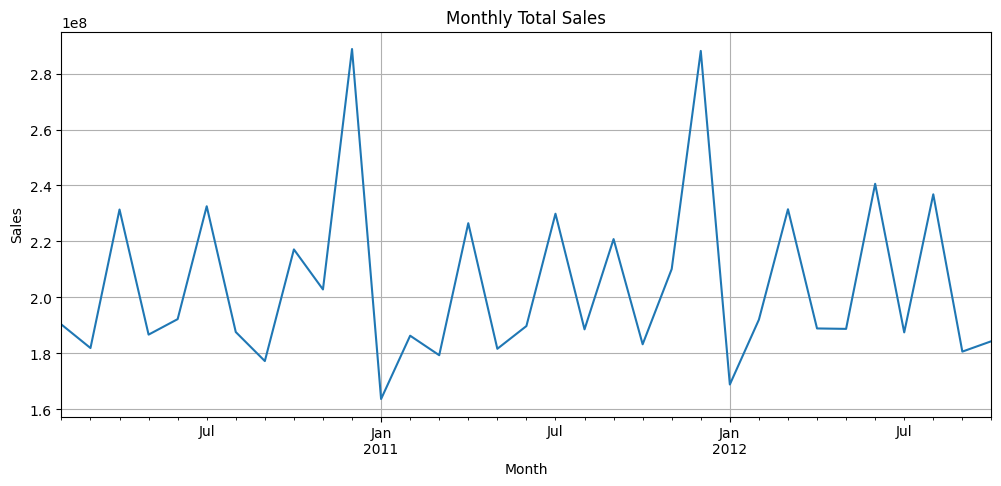

In [ ]:
plt.figure(figsize=(12,5))
monthly_sales.plot()
plt.title("Monthly Total Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


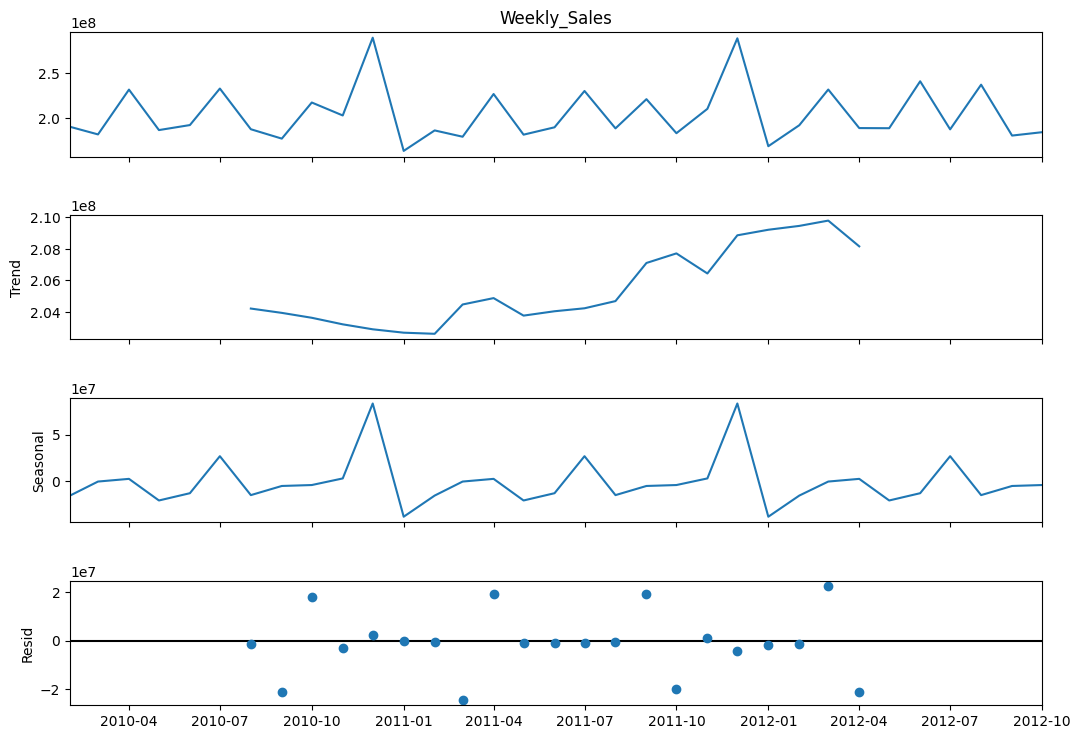

In [ ]:
decomp = seasonal_decompose(monthly_sales, model="additive", period=12)
fig = decomp.plot()
fig.set_size_inches(12,8)
plt.show()


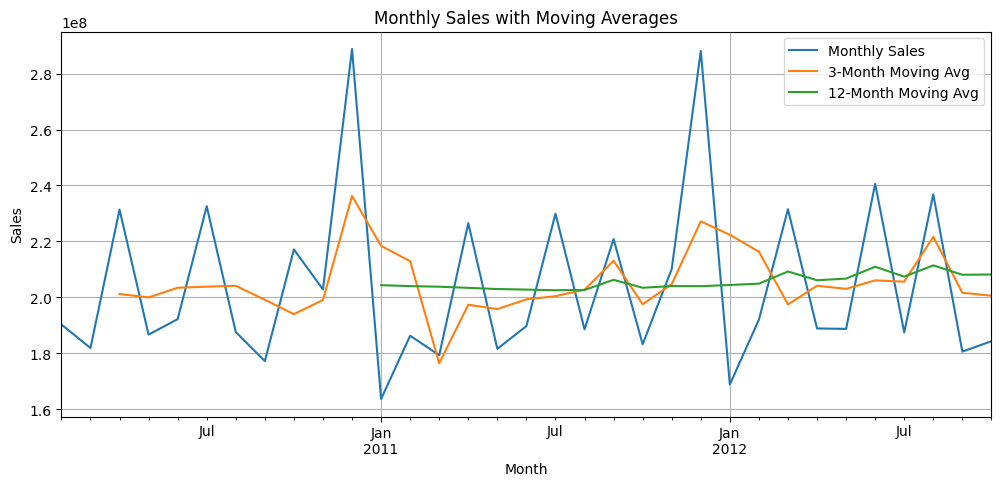

In [ ]:

plt.figure(figsize=(12,5))
monthly_sales.plot(label="Monthly Sales")
monthly_sales.rolling(3).mean().plot(label="3-Month Moving Avg")   # short-term
monthly_sales.rolling(12).mean().plot(label="12-Month Moving Avg") # long-term
plt.title("Monthly Sales with Moving Averages")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


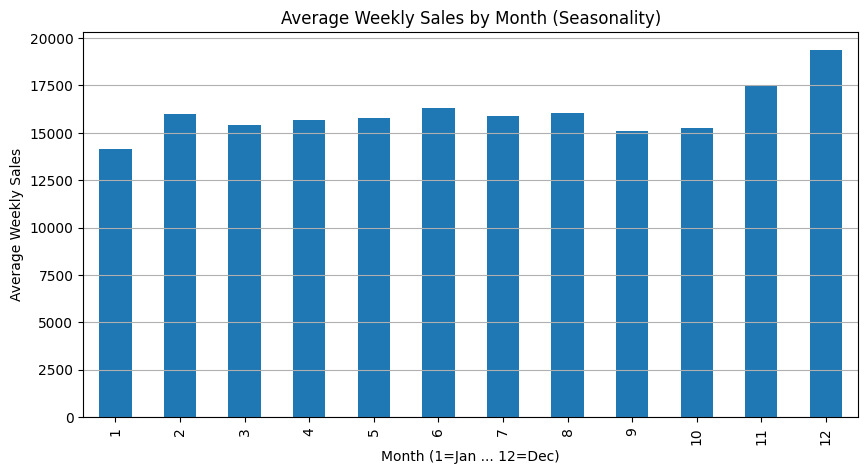

In [ ]:
# Average sales by calendar month (Jan–Dec)
avg_by_month = train_m.groupby(train_m['Date'].dt.month)['Weekly_Sales'].mean()

plt.figure(figsize=(10,5))
avg_by_month.plot(kind="bar")
plt.title("Average Weekly Sales by Month (Seasonality)")
plt.xlabel("Month (1=Jan ... 12=Dec)")
plt.ylabel("Average Weekly Sales")
plt.grid(True, axis="y")
plt.show()


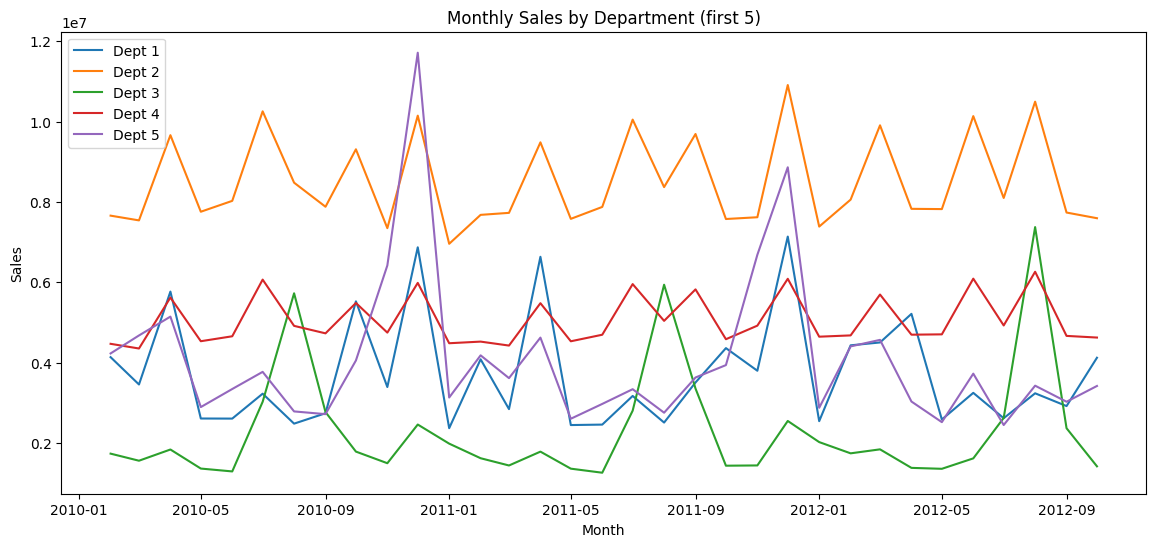

In [ ]:
# Monthly sales by department
dept_monthly = train_m.groupby([train_m['Date'].dt.to_period("M"), "Dept"])["Weekly_Sales"].sum().unstack("Dept").fillna(0)
dept_monthly = dept_monthly.to_timestamp()

# Plot for first few departments
plt.figure(figsize=(14,6))
for dept in dept_monthly.columns[:5]:   # sirf pehle 5 depts plot karenge (warna clutter hoga)
    plt.plot(dept_monthly.index, dept_monthly[dept], label=f"Dept {dept}")

plt.title("Monthly Sales by Department (first 5)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()


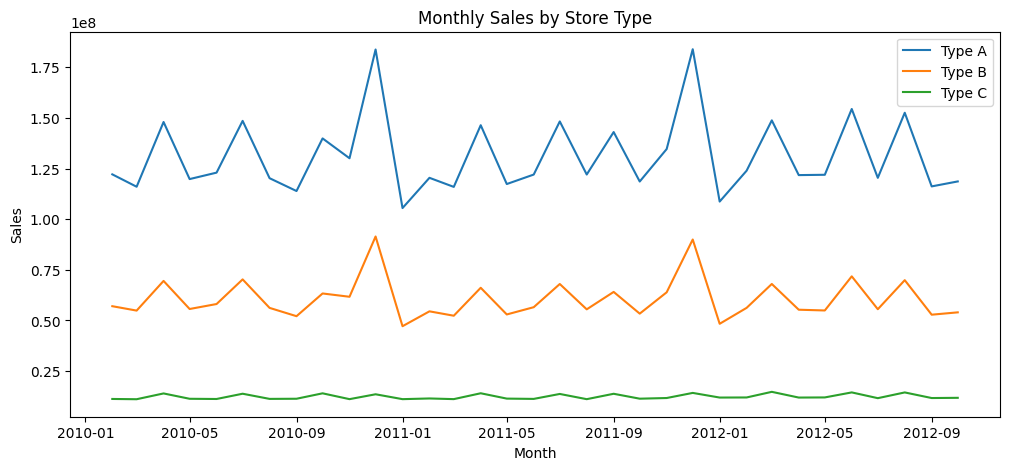

In [ ]:
# Monthly sales by store type
monthly_by_type = train_m.groupby([train_m['Date'].dt.to_period("M"), "Type"])["Weekly_Sales"].sum().unstack("Type").fillna(0)
monthly_by_type = monthly_by_type.to_timestamp()

plt.figure(figsize=(12,5))
for t in monthly_by_type.columns:
    plt.plot(monthly_by_type.index, monthly_by_type[t], label=f"Type {t}")

plt.title("Monthly Sales by Store Type")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.show()


# **BONUS TASK**

/tmp/ipython-input-3990084005.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_idx = pd.date_range(ts.index[-1] + MonthEnd(1), periods=6, freq="M")


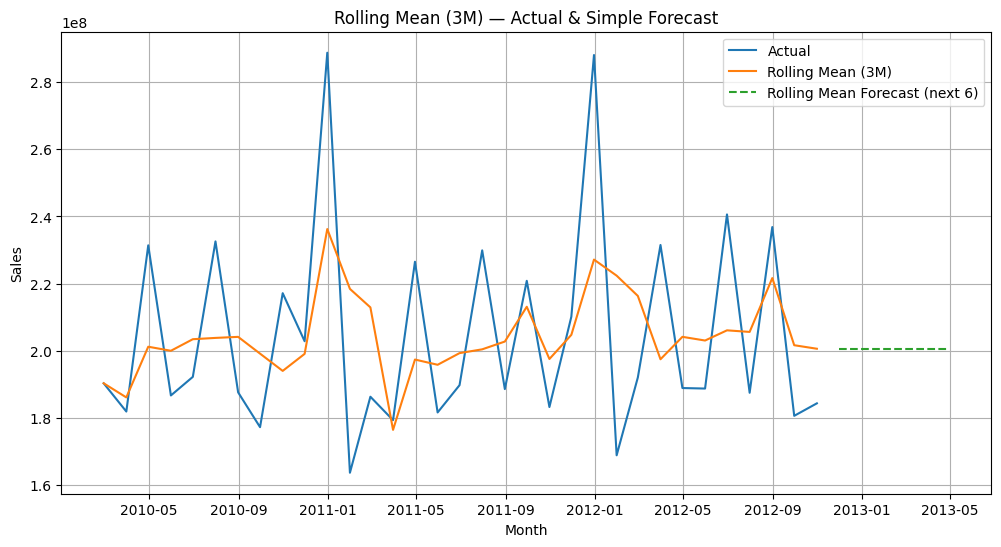

In [ ]:
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd
import numpy as np

# in-sample rolling mean
rolling_mean_3 = ts.rolling(window=3, min_periods=1).mean()

# naive next-6 forecast = last 3-month mean repeated
future_idx = pd.date_range(ts.index[-1] + MonthEnd(1), periods=6, freq="M")
last_ma = ts.tail(3).mean()
rm_forecast = pd.Series([last_ma]*len(future_idx), index=future_idx, name="RM_Forecast")

plt.figure(figsize=(12,6))
plt.plot(ts, label="Actual")
plt.plot(rolling_mean_3, label="Rolling Mean (3M)")
plt.plot(rm_forecast, label="Rolling Mean Forecast (next 6)", linestyle="--")
plt.title("Rolling Mean (3M) — Actual & Simple Forecast")
plt.xlabel("Month"); plt.ylabel("Sales"); plt.grid(True); plt.legend(); plt.show()


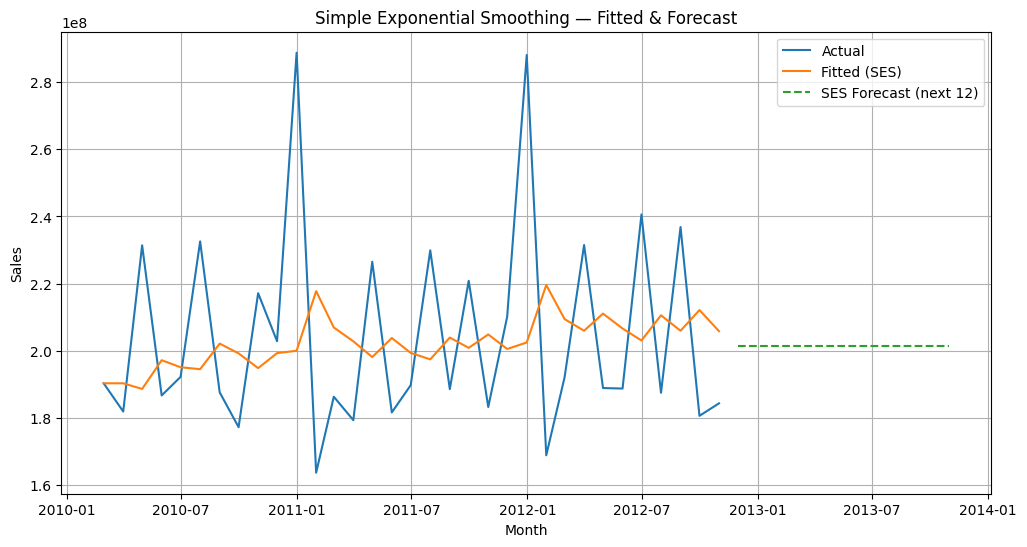

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# make sure no NaN left
if ts.isna().any():
    ts = ts.fillna(method="ffill")

ses = SimpleExpSmoothing(ts).fit(smoothing_level=0.2, optimized=False)  # tweak 0.1–0.4 if needed
ses_fore = ses.forecast(12)

plt.figure(figsize=(12,6))
plt.plot(ts, label="Actual")
plt.plot(ses.fittedvalues, label="Fitted (SES)")
plt.plot(ses_fore, label="SES Forecast (next 12)", linestyle="--")
plt.title("Simple Exponential Smoothing — Fitted & Forecast")
plt.xlabel("Month"); plt.ylabel("Sales"); plt.grid(True); plt.legend(); plt.show()
